In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
  #  df1 = pd.read_csv('2019-Dec.csv')
   # df2 = pd.read_csv('2019-Nov.csv')
    #df3 = pd.read_csv('2020-Jan.csv')
    #df4 = pd.read_csv('2020-Feb.csv')
    #df5 = pd.read_csv('2019-Oct.csv')
  #  dfs = [df1, df2, df3, df4, df5]

   # combined_df = pd.concat(dfs, ignore_index=True)
    #combined_df.to_csv('cos.csv', index=False)


In [73]:
df = pd.read_csv('cos.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [75]:
df.describe()

,product_id,category_id,price,user_id
count,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07
mean,5.484297e+06,1.554230e+18,8.534735e+00,5.215527e+08
std,1.305716e+06,1.691038e+17,1.938142e+01,8.744312e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05
25%,5.724650e+06,1.487580e+18,2.060000e+00,4.818306e+08
50%,5.810720e+06,1.487580e+18,4.050000e+00,5.531297e+08
75%,5.857864e+06,1.487580e+18,7.060000e+00,5.788573e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


In [76]:
df.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

In [77]:
print(df['brand'].value_counts().head(10))
print(df['category_code'].value_counts().head(10))


brand
runail       1528908
irisk        1033852
masura        861763
grattol       852591
bpw.style     434813
ingarden      430958
estel         360912
kapous        324394
jessnail      252996
uno           250377
Name: count, dtype: int64
category_code
appliances.environment.vacuum             149168
stationery.cartrige                        59728
apparel.glove                              52575
furniture.living_room.cabinet              30560
accessories.bag                            24253
furniture.bathroom.bath                    23931
appliances.personal.hair_cutter             5384
accessories.cosmetic_bag                    3644
appliances.personal.massager                3296
appliances.environment.air_conditioner       708
Name: count, dtype: int64


In [78]:
df.columns
df_copy = df.copy()
df_copy1 = df.copy()

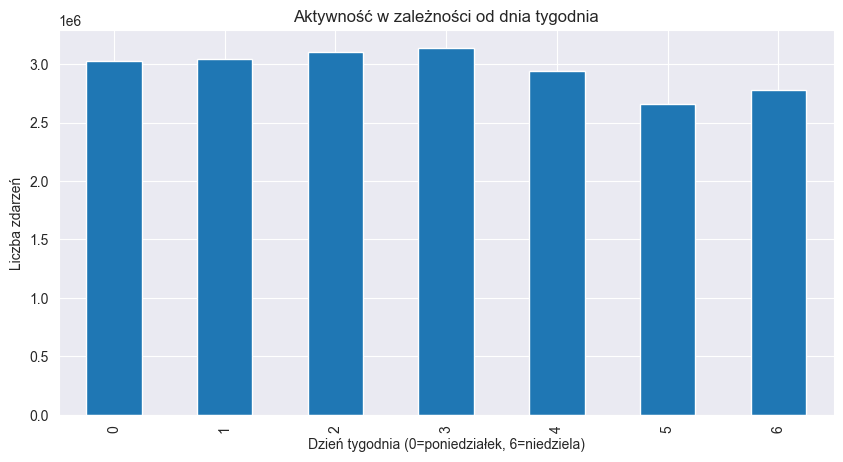

In [79]:
df_copy['event_time'] = pd.to_datetime(df_copy['event_time'])

# Ekstrakcja miesiąca i dnia tygodnia
df_copy['month'] = df_copy['event_time'].dt.month
df_copy['weekday'] = df_copy['event_time'].dt.weekday

# Wykres aktywności w zależności od dnia tygodnia
weekly_activity = df_copy.groupby('weekday').size()

plt.figure(figsize=(10, 5))
weekly_activity.plot(kind='bar')
plt.title('Aktywność w zależności od dnia tygodnia')
plt.xlabel('Dzień tygodnia (0=poniedziałek, 6=niedziela)')
plt.ylabel('Liczba zdarzeń')
plt.show()

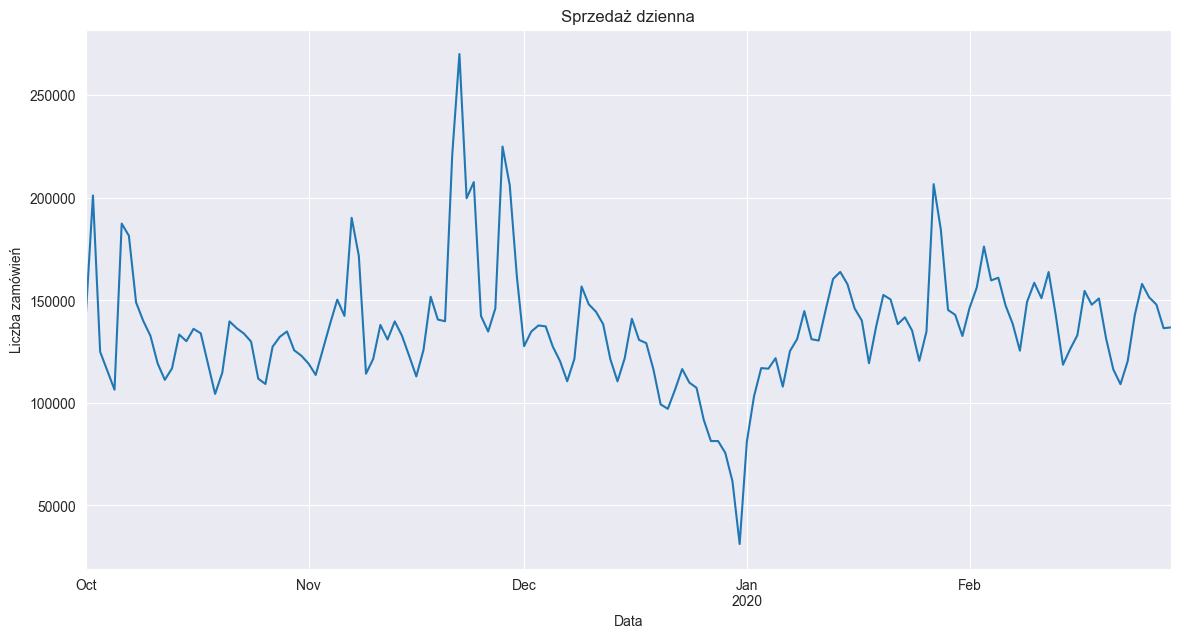

In [80]:
df_copy1['event_time'] = pd.to_datetime(df_copy['event_time'])
df_copy1.set_index('event_time', inplace=True)
df_copy1['count'] = 1

daily_sales = df_copy1.resample('D')['count'].sum()

plt.figure(figsize=(14,7))
daily_sales.plot(title='Sprzedaż dzienna')
plt.xlabel('Data')
plt.ylabel('Liczba zamówień')
plt.show()


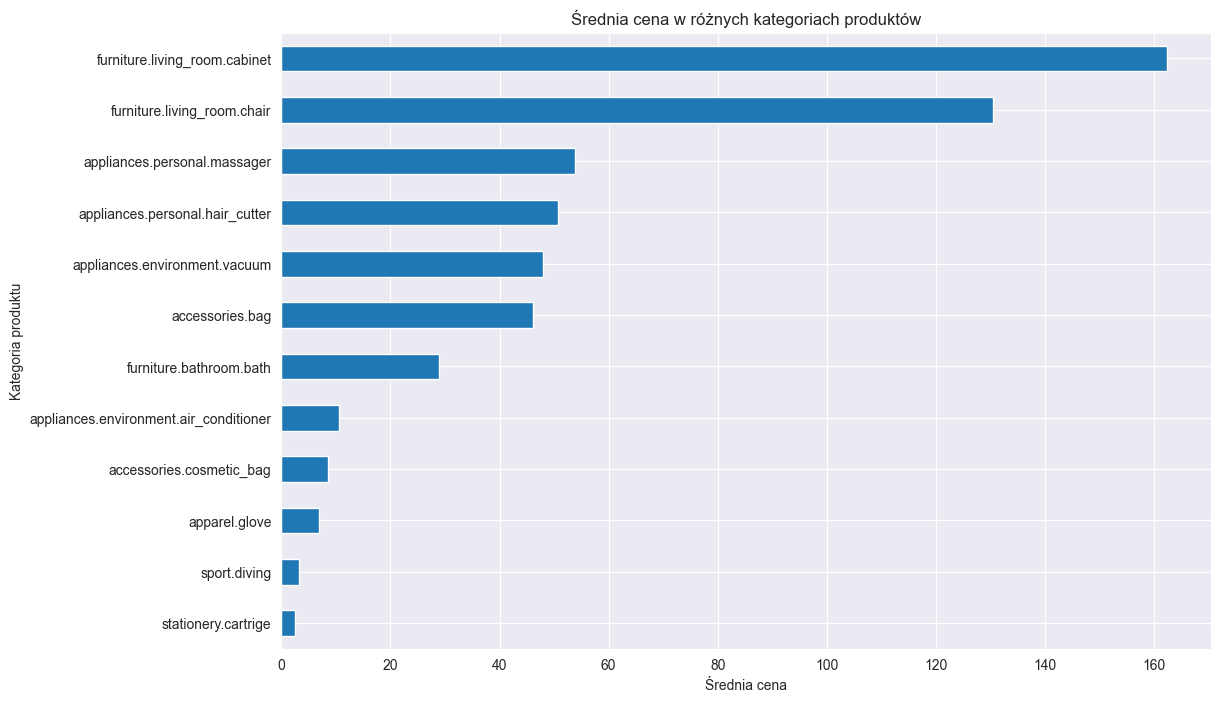

In [81]:
average_price_by_category = df.groupby('category_code')['price'].mean()

plt.figure(figsize=(12, 8))
average_price_by_category.sort_values().plot(kind='barh')
plt.title('Średnia cena w różnych kategoriach produktów')
plt.xlabel('Średnia cena')
plt.ylabel('Kategoria produktu')
plt.show()

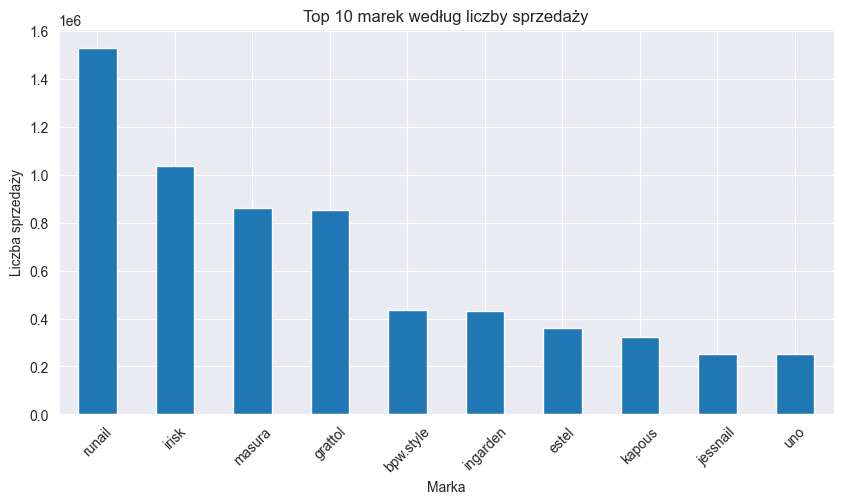

In [82]:
top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_brands.plot(kind='bar')
plt.title('Top 10 marek według liczby sprzedaży')
plt.xlabel('Marka')
plt.ylabel('Liczba sprzedaży')
plt.xticks(rotation=45)
plt.show()


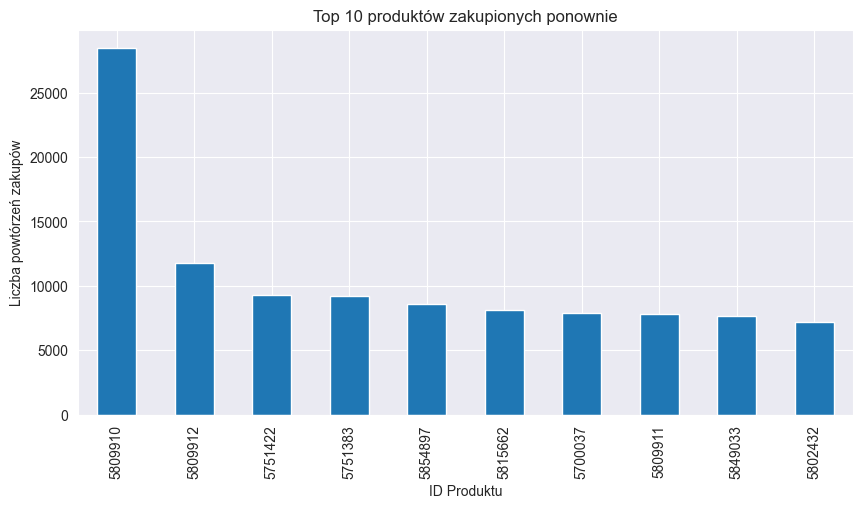

In [83]:
repeat_purchases = df.groupby(['user_id', 'product_id']).size()
repeat_purchases = repeat_purchases[repeat_purchases > 1].reset_index(name='counts')
top_repeats = repeat_purchases['product_id'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_repeats.plot(kind='bar')
plt.title('Top 10 produktów zakupionych ponownie')
plt.xlabel('ID Produktu')
plt.ylabel('Liczba powtórzeń zakupów')
plt.show()


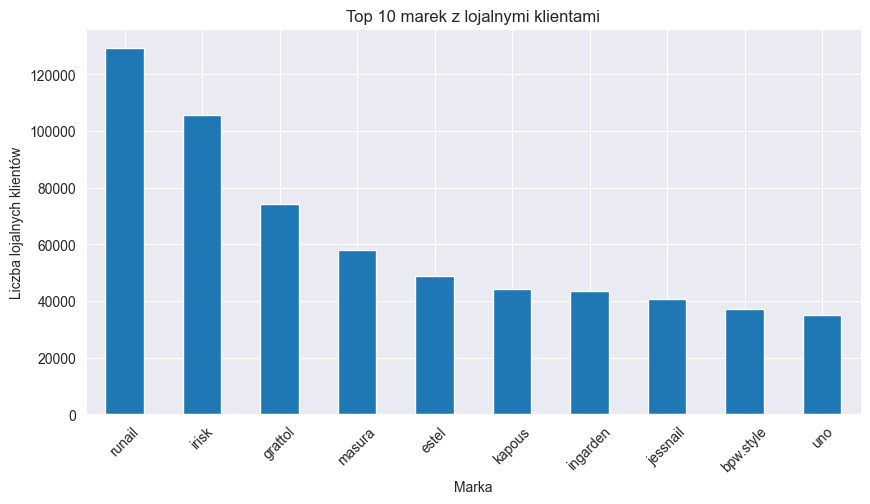

In [84]:
loyalty = df.groupby(['user_id', 'brand']).size().reset_index(name='purchases')
loyalty = loyalty[loyalty['purchases'] > 1]

brand_loyalty = loyalty['brand'].value_counts().head(10)

plt.figure(figsize=(10, 5))
brand_loyalty.plot(kind='bar')
plt.title('Top 10 marek z lojalnymi klientami')
plt.xlabel('Marka')
plt.ylabel('Liczba lojalnych klientów')
plt.xticks(rotation=45)
plt.show()


In [85]:
print("Unikalni użytkownicy:", df['user_id'].nunique())


Unikalni użytkownicy: 1639358


<Figure size 1000x600 with 0 Axes>

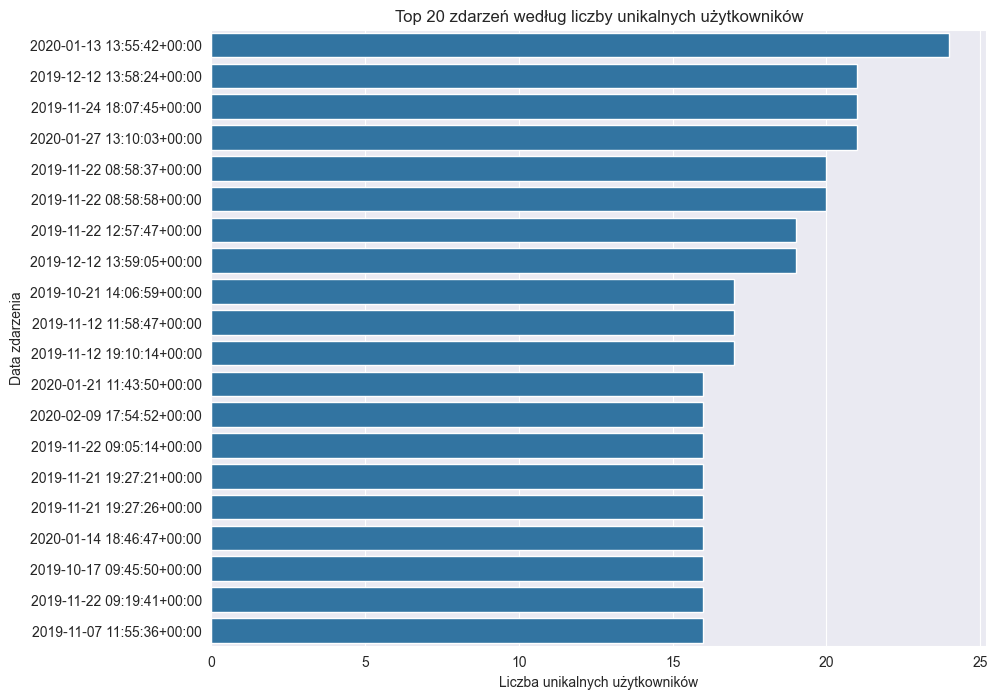

In [86]:
plt.figure(figsize=(10, 6))
brand_user_counts = df_copy.groupby('event_time')['user_id'].nunique().reset_index(name='count_of_user_id')

brand_user_counts = brand_user_counts.sort_values(by='count_of_user_id', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='count_of_user_id', y='event_time', data=brand_user_counts)
plt.title('Top 20 zdarzeń według liczby unikalnych użytkowników')
plt.xlabel('Liczba unikalnych użytkowników')
plt.ylabel('Data zdarzenia')
plt.show()

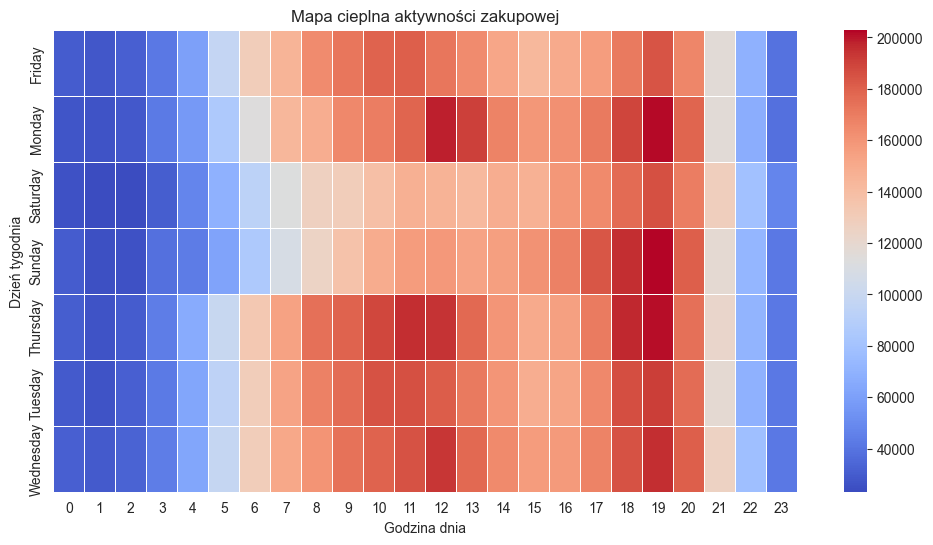

In [87]:
df['event_time'] = pd.to_datetime(df['event_time'])
df['hour'] = df['event_time'].dt.hour
df['day'] = df['event_time'].dt.day_name()

heatmap_data = df.groupby(['day', 'hour']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt="d", linewidths=.5)
plt.title('Mapa cieplna aktywności zakupowej')
plt.xlabel('Godzina dnia')
plt.ylabel('Dzień tygodnia')
plt.show()


<Figure size 1400x700 with 0 Axes>

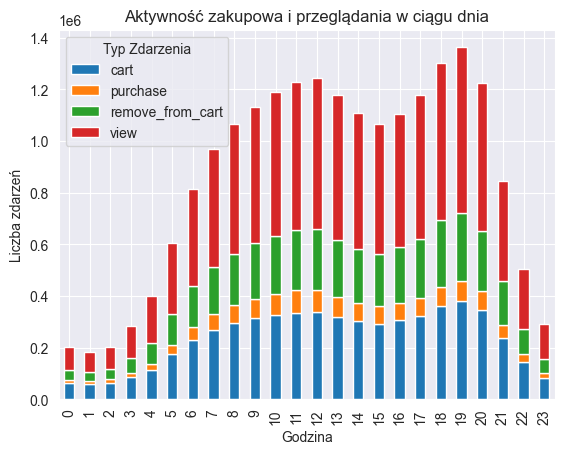

In [88]:
df['hour'] = df['event_time'].dt.hour
hourly_events = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
hourly_events.plot(kind='bar', stacked=True)
plt.title('Aktywność zakupowa i przeglądania w ciągu dnia')
plt.xlabel('Godzina')
plt.ylabel('Liczba zdarzeń')
plt.legend(title='Typ Zdarzenia')
plt.show()
